# EDA With Energy Data

### In this notebook, I am going to look into a couple datasets that provide insight into some energy consumption data around the world before I take a deeper look into a specific country's (India's) energy profile.

In [42]:
# Loading Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import missingno as mno
import urllib.request


### Univariable Data Visualization

### Change Label Encoder in other 2 Projects

In [43]:
#Global Energy Usage Dataframe:
gdf = pd.read_csv('/Users/vishva/elec/global_power_plant_database.csv')

#Daily Electricity Power Generation in India:
idf = pd.read_csv('/Users/vishva/elec/State_Region_corrected.csv')

#Location of Indian States:
ldf = pd.read_csv('/Users/vishva/elec/poptable.csv')

#Method of Indian Power Aquisition:
adf = pd.read_csv('/Users/vishva/elec/indiamethods.csv')

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
#Showing all columns
pd.set_option('display.max_columns', None)

In [45]:
gdf.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [46]:
gdf.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [47]:
gdf.dtypes

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

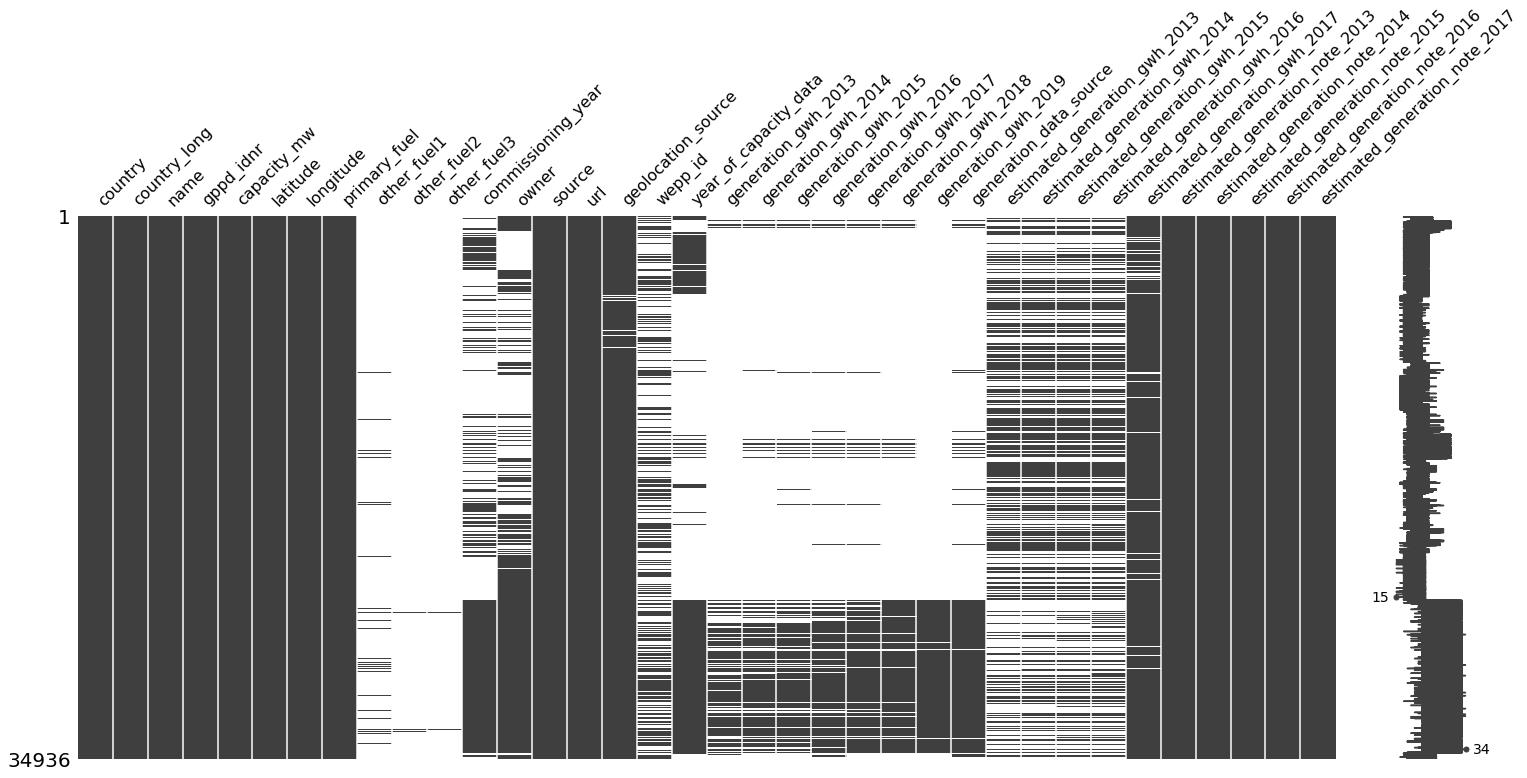

In [48]:
mno.matrix(gdf)

There is clearly ***quite*** a lot of missing data. This is to be expected because most countries are very  
secretive about their energy consumption. It would be interesting to look into which countrys actually provide  
information about production by 2019. From the graph, it is clear that countries that did not provide information  
in 2019 likely did not provide it in 2013 either. Thus, 2019 ought to be a good indicator for considering the transparency of countries.

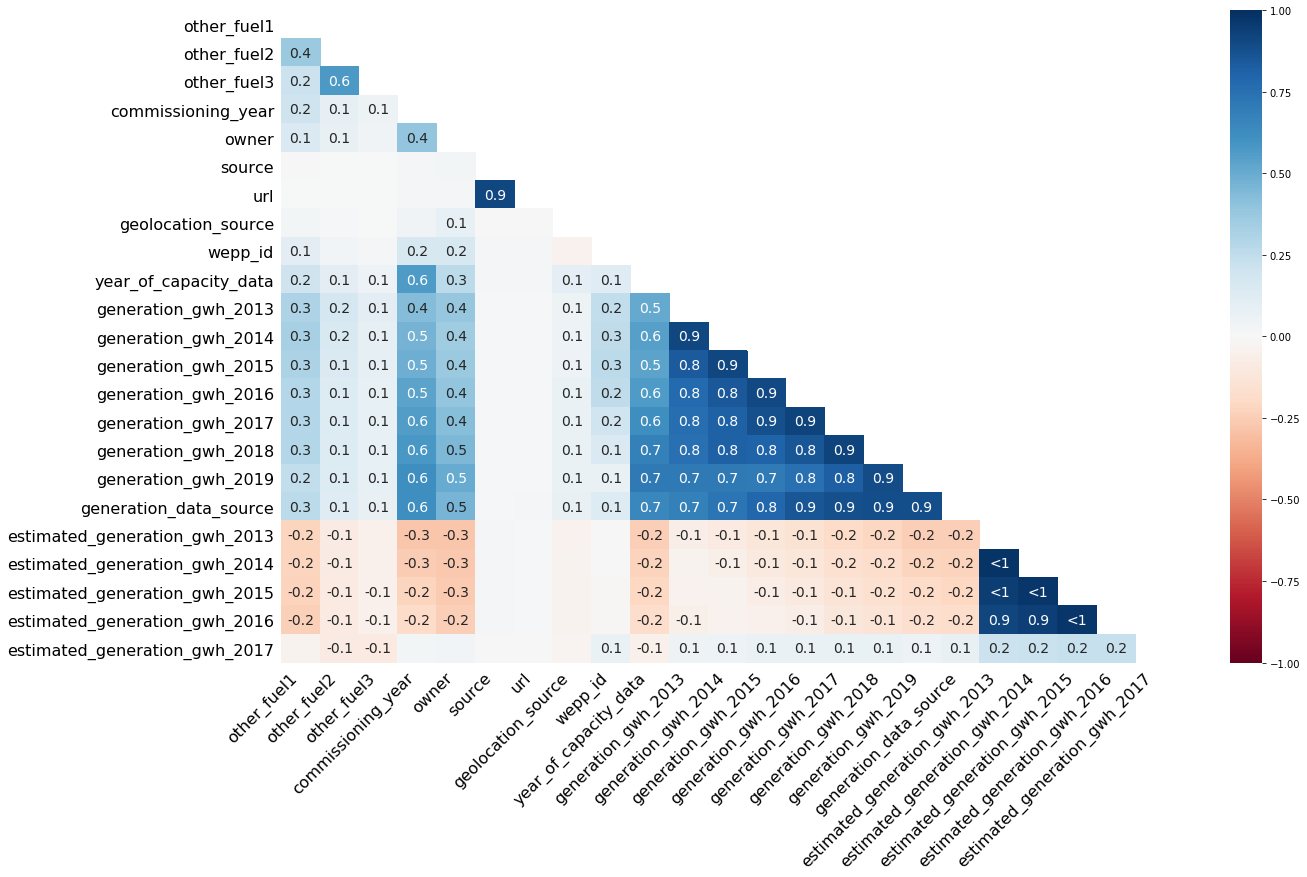

In [49]:
mno.heatmap(gdf)

This confirms my earlier suspicion that refusal to provide information about the amount of energy generated in any  given year is correlated with sustained refusal to provide the statistic in subsequent/previous years.

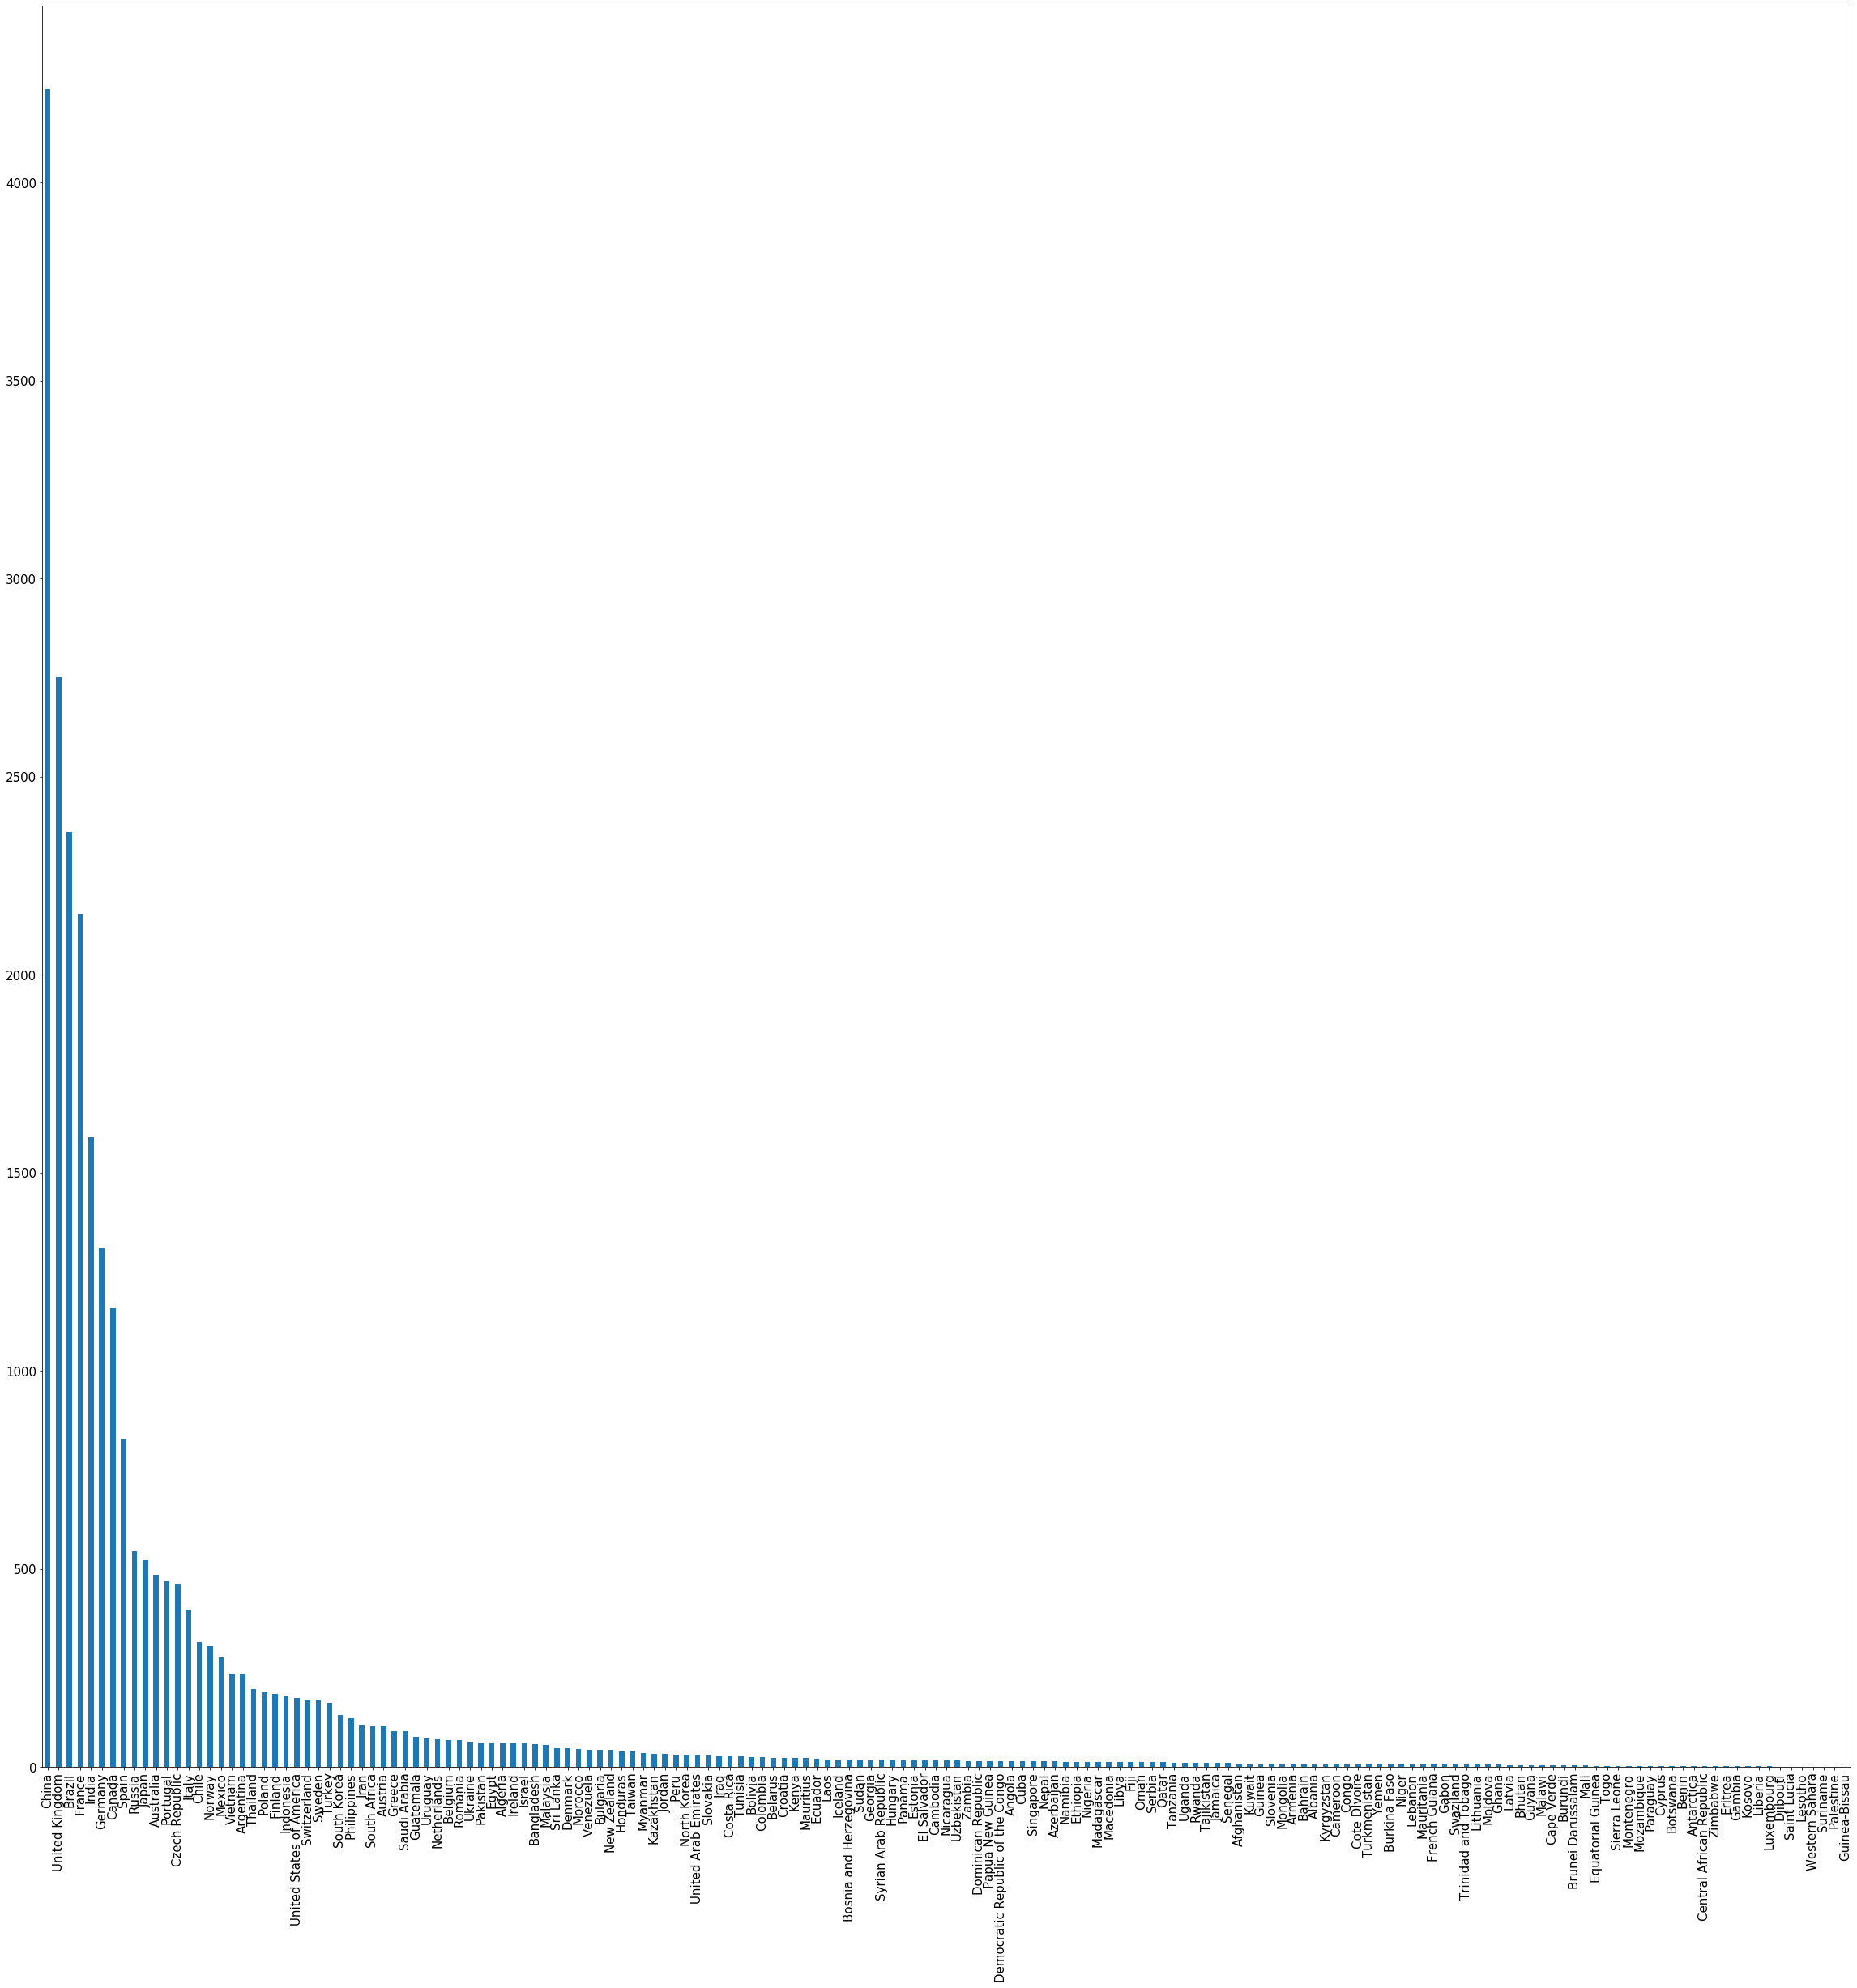

In [50]:
sub = gdf.loc[gdf['generation_gwh_2019'].isnull()]
sub['country_long'].value_counts().plot(kind='bar', figsize = (40,40), fontsize = 15)

In [51]:
sub['country_long'].value_counts()[:10].index.tolist()

['China',
 'United Kingdom',
 'Brazil',
 'France',
 'India',
 'Germany',
 'Canada',
 'Spain',
 'Russia',
 'Japan']

Considering that providing this information is voluntary, it is understandable why many powerful countries chose to refrain from sharing their energy production as of 2019 (China, UK, Russia) so as to maintain national security and ensure the protection of domestic industries.

In [52]:
#Dropping all columns with substantial missing values

gdf = gdf.drop("other_fuel1", axis = 1)
gdf = gdf.drop("other_fuel2", axis = 1)
gdf = gdf.drop("other_fuel3", axis = 1)
gdf = gdf.drop("commissioning_year", axis = 1)
gdf = gdf.drop("url", axis = 1)
gdf = gdf.drop("estimated_generation_gwh_2013", axis = 1)
gdf = gdf.drop("estimated_generation_gwh_2014", axis = 1)
gdf = gdf.drop("estimated_generation_gwh_2015", axis = 1)
gdf = gdf.drop("estimated_generation_gwh_2016", axis = 1)
gdf = gdf.drop("estimated_generation_gwh_2017", axis = 1)
gdf = gdf.drop("wepp_id", axis = 1)
gdf = gdf.drop("year_of_capacity_data", axis = 1)
gdf = gdf.drop("source", axis = 1)
gdf = gdf.drop("geolocation_source", axis = 1)
gdf = gdf.drop("generation_gwh_2013", axis = 1)
gdf = gdf.drop("generation_gwh_2014", axis = 1)
gdf = gdf.drop("generation_gwh_2015", axis = 1)
gdf = gdf.drop("generation_gwh_2016", axis = 1)
gdf = gdf.drop("generation_gwh_2017", axis = 1)
gdf = gdf.drop("generation_gwh_2018", axis = 1)
gdf = gdf.drop("generation_gwh_2019", axis = 1)
gdf = gdf.drop("generation_data_source", axis = 1)

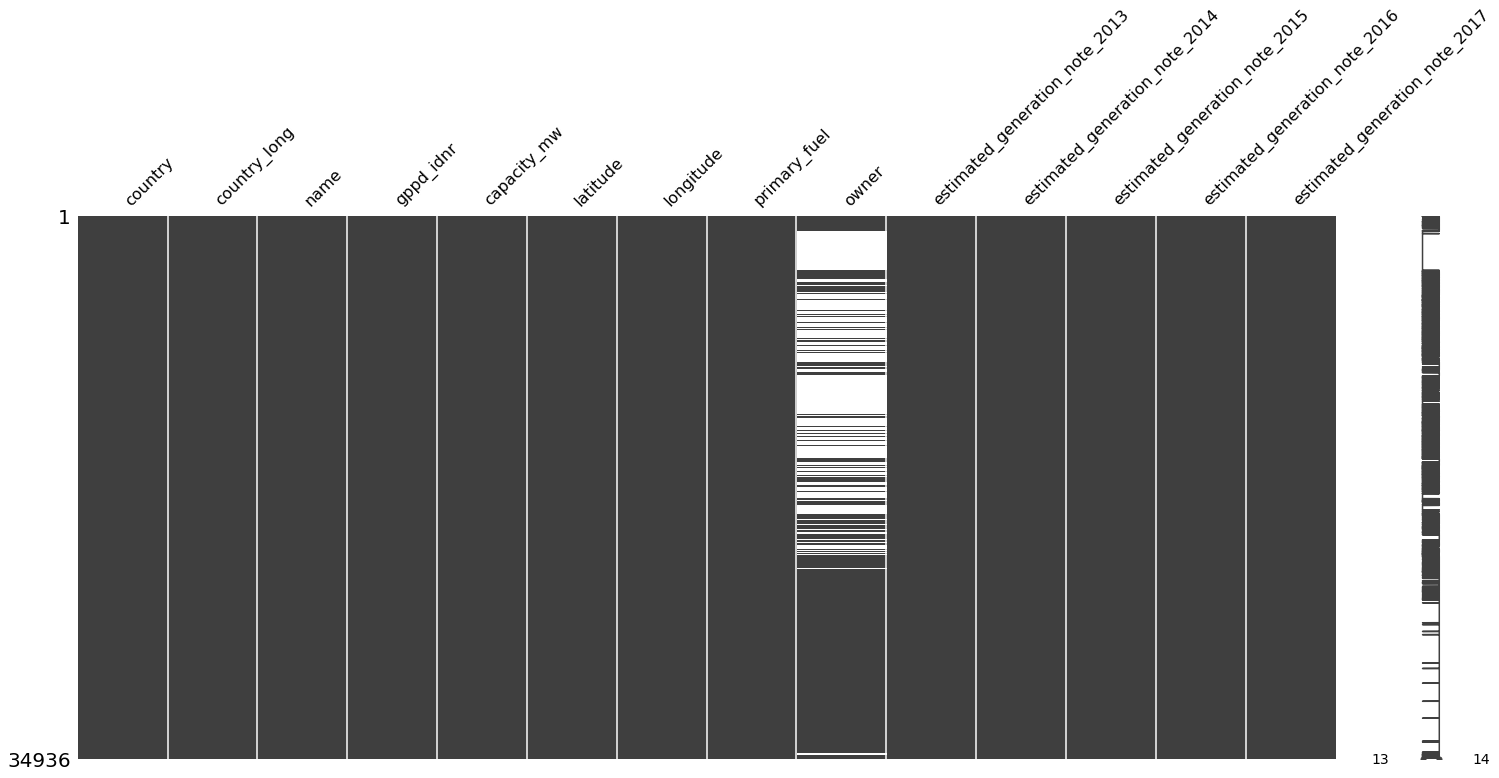

In [53]:
mno.matrix(gdf)

In [54]:
gdf.loc[gdf['owner'].isnull()]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34901,VNM,Vietnam,Tuy Phong,WRI1030750,30.0,11.2122,108.2000,Wind,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34911,ESH,Western Sahara,Dakhla IC Power Plant Western Sahara,GEODB0042583,23.4,23.6816,-15.9594,Oil,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
34921,ZMB,Zambia,Kafue,WKS0066036,47.5,-15.5500,28.3500,Solar,NaN,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


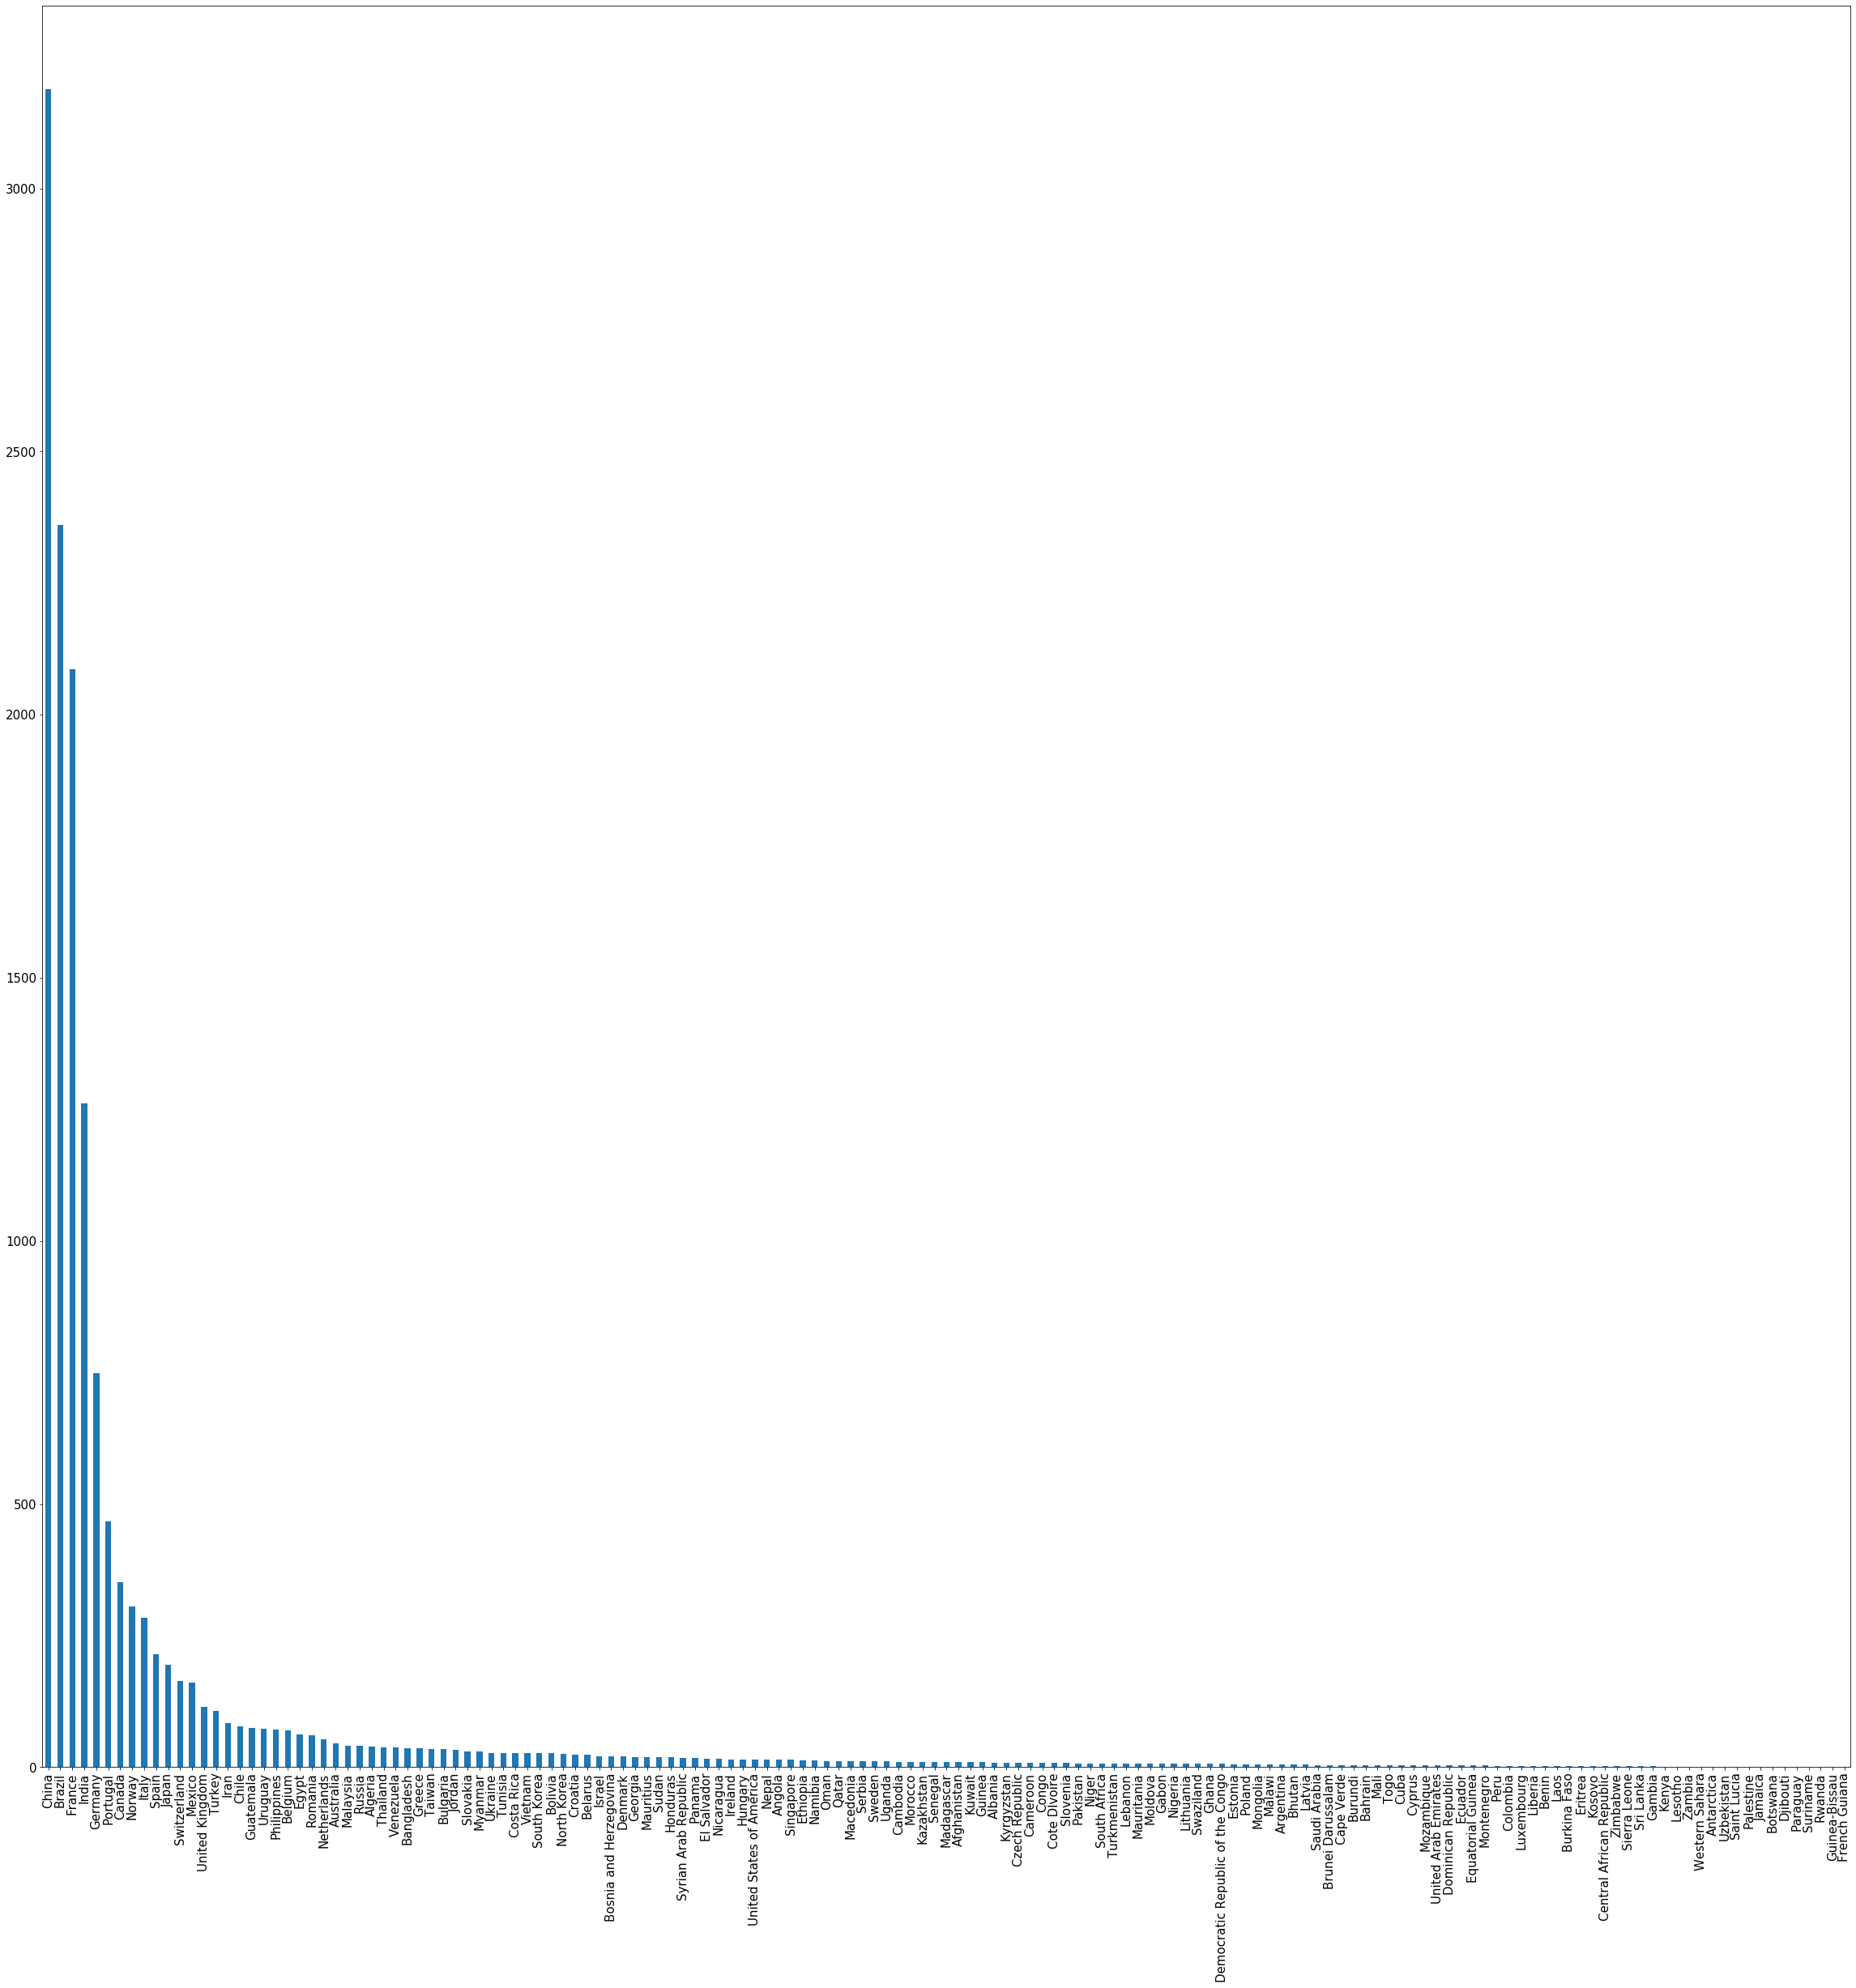

In [55]:
sub = gdf.loc[gdf['owner'].isnull()]
sub['country_long'].value_counts().plot(kind='bar', figsize = (40,40), fontsize = 15)

I am unable to discern any significant relationship between the missing data and the type of ownership for the  
plants. This is because the majority of the missing information comes from the fact that countries likely are  
not sharing the information. I had a suspicion that the missing data was a result of state ownership, but there  
is not insufficient information to reach such a conclusion.

In [56]:
# Loading configuaration for KeplerGl
configs= {'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': '40n886l',
     'type': 'point',
     'config': {'dataId': 'data_1',
      'label': 'Point',
      'color': [18, 147, 154],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'latitude', 'lng': 'longitude', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 2.4,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Ocean Green 6',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#37535E',
         '#3A748A',
         '#4095B5',
         '#52AEC9',
         '#72BFC4',
         '#93CFBF']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'capacity_mw', 'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'data_1': [{'name': 'country',
        'format': None},
       {'name': 'name', 'format': None},
       {'name': 'gppd_idnr', 'format': None},
       {'name': 'capacity_mw', 'format': None},
       {'name': 'owner', 'format': None},
       {'name': 'primary_fuel', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 0.5, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': 26.016047593333116,
   'longitude': -3.967198516878859,
   'pitch': 0,
   'zoom': 0.8197140038455432,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

In [57]:
#Importing and using KeplerGl library to visualize the locations of major powerplants around the world
from keplergl import KeplerGl
ELocs = KeplerGl(height = 1000, data = {"data_1": gdf},config = configs)
ELocs

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '40n886l', 'type': …

In [58]:
#Types of Fuel used by countries:
gdf["primary_fuel"].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [59]:
gdf["primary_fuel"].value_counts()

Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: primary_fuel, dtype: int64

Text(0.5, 1.0, 'primary_fuel')

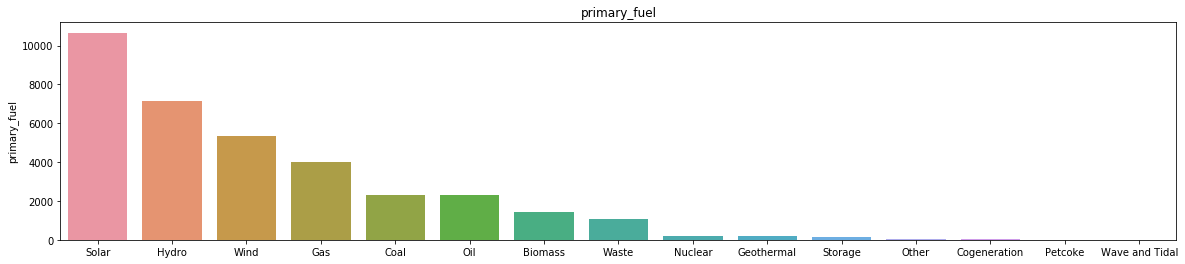

In [60]:
plt.figure(figsize = (20,4))
sns.barplot(gdf['primary_fuel'].value_counts().index,gdf
            ['primary_fuel'].value_counts()).set_title('primary_fuel')


Though most countries report using solar as the most used energy source, this may be misleading (as many countires)  
chose not to report their usage statistics. It is especially suspcious for oil to be ranked so low as the primary fuel for countries.

Text(0.5, 1.0, 'estimated_generation_note_2013')

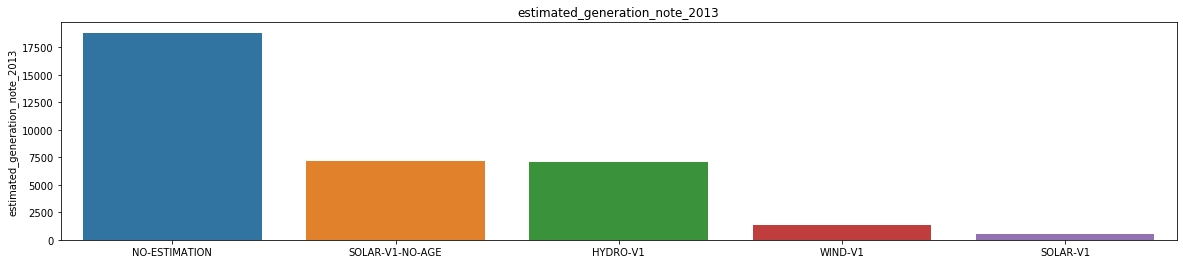

In [61]:
plt.figure(figsize = (20,4))
sns.barplot(gdf['estimated_generation_note_2013'].value_counts().index,gdf
            ['estimated_generation_note_2013'].value_counts()).set_title('estimated_generation_note_2013')


Text(0.5, 1.0, 'estimated_generation_note_2014')

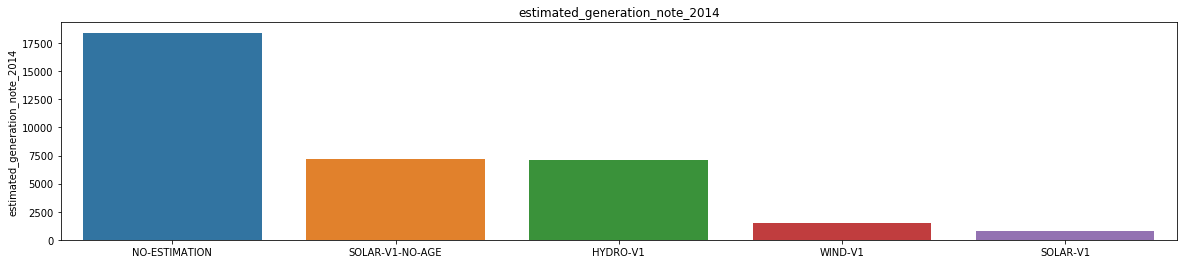

In [62]:
plt.figure(figsize = (20,4))
sns.barplot(gdf['estimated_generation_note_2014'].value_counts().index,gdf
            ['estimated_generation_note_2014'].value_counts()).set_title('estimated_generation_note_2014')


Text(0.5, 1.0, 'estimated_generation_note_2015')

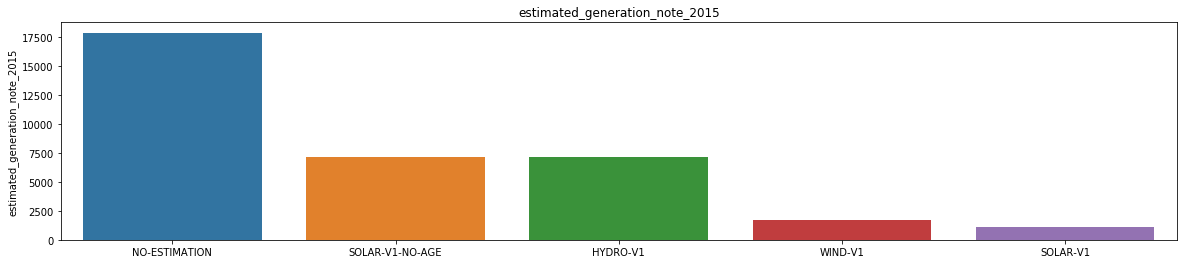

In [63]:
plt.figure(figsize = (20,4))
sns.barplot(gdf['estimated_generation_note_2015'].value_counts().index,gdf
            ['estimated_generation_note_2015'].value_counts()).set_title('estimated_generation_note_2015')


Text(0.5, 1.0, 'estimated_generation_note_2016')

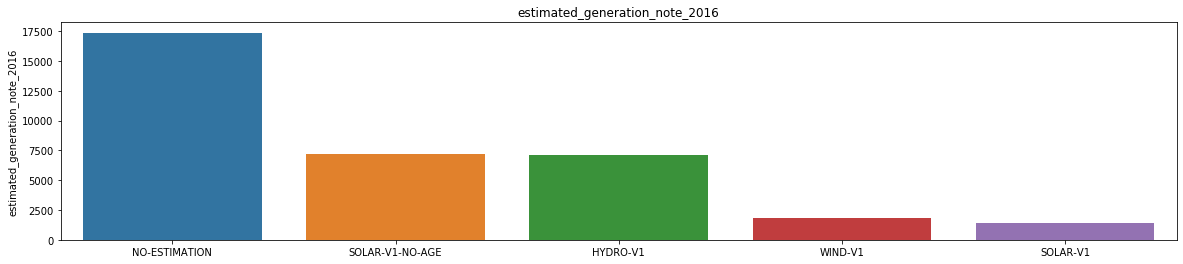

In [64]:
plt.figure(figsize = (20,4))
sns.barplot(gdf['estimated_generation_note_2016'].value_counts().index,gdf
            ['estimated_generation_note_2016'].value_counts()).set_title('estimated_generation_note_2016')

Text(0.5, 1.0, 'estimated_generation_note_2017')

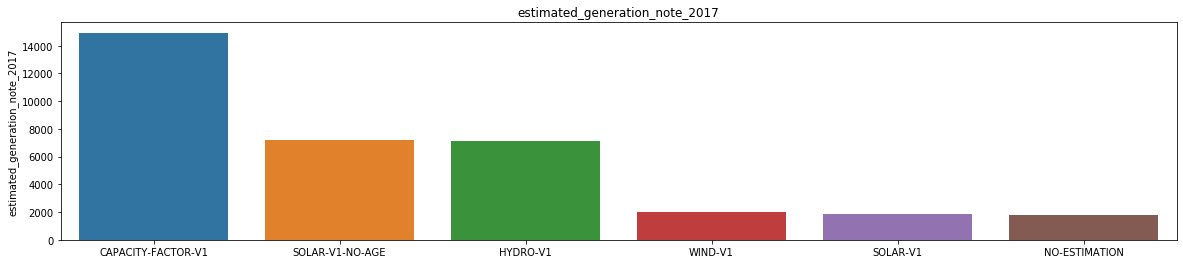

In [65]:
plt.figure(figsize = (20,4))
sns.barplot(gdf['estimated_generation_note_2017'].value_counts().index,gdf
            ['estimated_generation_note_2017'].value_counts()).set_title('estimated_generation_note_2017')

There appears to be no major distinctions for the 5 years of "estimated_generation_notes" provided. This may be because of unreliable predictive measures or because of a lack of information from countries.

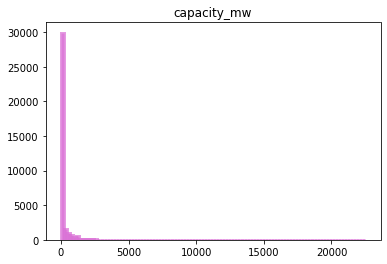

In [66]:
plt.hist(gdf['capacity_mw'], bins=100, facecolor='orchid', edgecolor='orchid', linewidth=3, alpha=0.7)
plt.title('capacity_mw')
plt.show()

In [67]:
gdf['capacity_mw'].describe()

count    34936.000000
mean       163.355148
std        489.636072
min          1.000000
25%          4.900000
50%         16.745000
75%         75.344250
max      22500.000000
Name: capacity_mw, dtype: float64

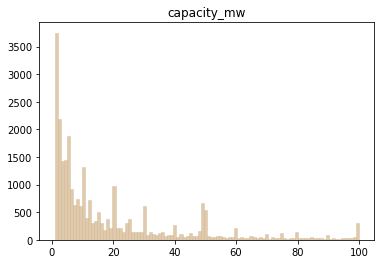

In [68]:
# Readjusting the histogram to increase focus on left side of the data
xmin = 0
xmax = 100
inD = gdf[(gdf["capacity_mw"] >= xmin) & (gdf["capacity_mw"] <= xmax)]
plt.hist(inD['capacity_mw'], bins=100, facecolor='tan', edgecolor='tan', linewidth=.5, alpha=0.7)
plt.title('capacity_mw')
plt.show()

Most of the data is concentrated on the lower spectrum for the capacity of megawatts (to be expected as most powerplants are not extremely powerful). I think it would be interesting to look at some of the most/least powerful powerplants.

In [69]:
gdf.sort_values('capacity_mw', ascending = False, inplace = True, ignore_index=True)
gdf.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,CHN,China,Three Gorges Dam,WRI1000452,22500.0,30.8235,111.0032,Hydro,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
1,CHN,China,Baihetan Dam,WRI1070877,13050.0,28.2606,103.6484,Hydro,NaN,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
2,CHN,China,Xiluodu,WRI1000453,12600.0,28.2600,103.6500,Hydro,NaN,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
3,RUS,Russia,Surgutskaya GRES-2,WRI1003821,8865.0,61.2794,73.4889,Gas,"PJSC ""Unipro""",NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
4,VEN,Venezuela,Simon Bolivar (Guri),WRI1018677,8851.0,7.7659,-62.9982,Hydro,NaN,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
5,BRA,Brazil,Tucuruí,BRA0002889,8535.0,-3.8322,-49.6522,Hydro,NaN,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
6,JPN,Japan,Kashiwazaki Kariwa,WRI1000679,8212.0,37.4259,138.5941,Nuclear,Tokyo,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
7,BRA,Brazil,Itaipu (Parte Brasileira),BRA0001161,7000.0,-25.4269,-54.5931,Hydro,NaN,NO-ESTIMATION,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
8,PRY,Paraguay,Itaipu Binacional Dam (Paraguay part),WRI1022983,7000.0,-25.4081,-54.5889,Hydro,Brazil and Paraguay Government,HYDRO-V1,HYDRO-V1,HYDRO-V1,NO-ESTIMATION,CAPACITY-FACTOR-V1
9,CHN,China,East Hope Metals Wucaiwan power station,WRI1075600,7000.0,44.6885,89.1138,Coal,Xinjiang East Hope Non-Ferrous Metal Co Ltd.,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [70]:
gdf.sort_values('capacity_mw', ascending = True, inplace = True, ignore_index=True)
gdf.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,USA,United States of America,SunEdison Anheuser Busch Fairfield,USA0057010,1.0,38.2321,-122.0927,Solar,SunE M5 Holdings LLC,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1
1,DEU,Germany,Leideneck Solar Power Plant,WRI1030236,1.0,50.0403,7.3650,Solar,NaN,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,PHL,Philippines,San Luis,WRI1030472,1.0,15.6854,121.4748,Hydro,Epower Technologies Corp.,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
3,USA,United States of America,Pelzer Solar I,USA0061945,1.0,34.6576,-82.5020,Solar,Pelzer Solar I LLC,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
4,USA,United States of America,Panda Solar NC 6 LLC,USA0062124,1.0,34.3536,-78.7874,Solar,Panda Solar NC 6 LLC,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
5,BRA,Brazil,Evo,BRA0030588,1.0,-24.4740,-51.7922,Hydro,NaN,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
6,CHN,China,Landfill Linyi Landfill,WRI1071597,1.0,35.3172,118.2975,Gas,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
7,USA,United States of America,Anderson Power Products Division,USA0010553,1.0,42.4714,-71.7433,Oil,Anderson Power Products,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
8,GBR,United Kingdom,Billinge Hill Quarry Landfill Scheme,GBR0000573,1.0,53.5062,-2.7176,Waste,Bidston Methane Ltd.,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
9,CAN,Canada,Black Bay 2,CAN0007680,1.0,48.9428,-88.3141,Solar,2397995 Ontario Inc,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE


Maybe this is out of a citizenship bias, but I did not think that the US have a powerplant of the lowest capacity 
in megawatts. China is also a surprising contender with the greatest energy production because of the sheer amount of missing data.

#### I will now be looking at India in particular to get some further insight into its power generation. I am particularly interested in understanding some of the reason behind the region's sustained power outtages and energy-related issues. 

In [71]:
# Mapping the power generation in India with the corresponding Latitude and Longitude of each Indian state
idf['State / Union territory (UT)'] = idf['State / Union territory (UT)'].str.title()
ldf['State.Name'] = ldf['State.Name'].str.title()
ldf.sort_values('State.Name', ascending = True, inplace = True, ignore_index=True)
idf.sort_values('State / Union territory (UT)', ascending = True, inplace = True, ignore_index=True)
ldf['State.Name'] = ldf['State.Name'].str.strip()
idf['longitude'] = idf['State / Union territory (UT)'].map(ldf.set_index('State.Name')['longitude'])
idf['latitude'] = idf['State / Union territory (UT)'].map(ldf.set_index('State.Name')['latitude'])

In [72]:
#After mapping the values, there are still some missing values for the coordinates.
sub = idf.loc[idf['latitude'].isnull()]
sub

,State / Union territory (UT),Area (km2),Region,National Share (%),longitude,latitude
6,Dadra And Nagar Haveli And Daman And Diu,603,Western,0.01,NaN,NaN
9,Gujarat,196024,Western,5.96,NaN,NaN
16,Ladakh,59146,Northern,1.80,NaN,NaN
23,Odisha,155707,Eastern,4.73,NaN,NaN
29,Telangana,112077,Southern,3.49,NaN,NaN
32,Uttarakhand,53483,Northern,1.62,NaN,NaN


In [73]:
# After looking into the location of each of these regions (latlong.net), I have obtained their corresponding
# latiudes and longitudes.

idf.at[6, 'latitude'] = '20.266578'
idf.at[6, 'longitude'] = '73.016618'

idf.at[9, 'latitude'] = '22.309425'
idf.at[9, 'longitude'] = '72.136230'

idf.at[16, 'latitude'] = '34.209515'
idf.at[16, 'longitude'] = '77.615112'

idf.at[23, 'latitude'] = '20.296059'
idf.at[23, 'longitude'] = '85.824539'

idf.at[29, 'latitude'] = '17.387140'
idf.at[29, 'longitude'] = '78.491684'

idf.at[32, 'latitude'] = '28.843624'
idf.at[32, 'longitude'] = '79.899681'

In [74]:
# Loading configuration for KeplerGl
config = {'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'nc9utgs',
     'type': 'point',
     'config': {'dataId': 'data_1',
      'label': 'Point',
      'color': [119, 110, 87],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'latitude', 'lng': 'longitude', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 35.9,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 0.5,
       'strokeColor': None,
       'colorRange': {'name': 'Pink Wine 6',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#2C1E3D',
         '#573660',
         '#83537C',
         '#A6758E',
         '#C99DA4',
         '#EDD1CA']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': {'name': 'National Share (%)', 'type': 'real'},
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'National Share (%)',
       'type': 'real'},
      'colorScale': 'quantile',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'data_1': [{'name': 'State / Union territory (UT)',
        'format': None},
       {'name': 'Area (km2)', 'format': None},
       {'name': 'Region', 'format': None},
       {'name': 'National Share (%)', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': False},
    'brush': {'size': 0, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': 26.400180803211185,
   'longitude': 81.45145541804015,
   'pitch': 0,
   'zoom': 3.919204492406288,
   'isSplit': False},
  'mapStyle': {'styleType': 'dark',
   'topLayerGroups': {},
   'visibleLayerGroups': {'label': True,
    'road': True,
    'border': False,
    'building': True,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [9.665468314072013,
    17.18305478057247,
    31.1442867897876],
   'mapStyles': {}}}}

In [75]:
kep = KeplerGl(height = 1000, data = {"data_1": idf}, config = config)
kep

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'nc9utgs', 'type': …

Part of the power crisis may be because of a large concetrantion of the energy in a small number of states. For instance, looking at the northeast portion of the graph, we can see many smaller numbers for the amount of energy used by each state (which is contrasted with central/northern India).

#### I will now look at the "aquisition" dataset for India's energy. This dataset details the different methods of energy aquisition for different regions in India.

In [76]:
adf.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [77]:
#Dropping date as it is not useful
#adf = adf.drop('Date', axis = 1)

In [78]:
adf.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [79]:
adf.columns

Index(['index', 'Date', 'Region', 'Thermal Generation Actual (in MU)',
       'Thermal Generation Estimated (in MU)',
       'Nuclear Generation Actual (in MU)',
       'Nuclear Generation Estimated (in MU)',
       'Hydro Generation Actual (in MU)',
       'Hydro Generation Estimated (in MU)'],
      dtype='object')

In [80]:
sub = adf[['Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Nuclear Generation Actual (in MU)','Nuclear Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']]

In [81]:
sub

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,624.23,484.21,30.36,35.57,273.27,320.81
1,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,576.66,578.55,62.73,49.80,111.57,64.78
3,441.02,429.39,NaN,NaN,85.94,69.36
4,29.11,15.91,NaN,NaN,24.64,21.21
...,...,...,...,...,...,...
4940,669.47,602.96,26.88,23.41,348.72,351.98
4941,"1,116.00","1,262.10",42.37,36.63,54.67,20.28
4942,494.66,415.53,61.83,26.28,93.49,77.25
4943,482.86,547.03,NaN,NaN,87.22,93.78


In [82]:
sub.describe()

,Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
count,2967.000000,2967.000000,4945.000000,4945.000000
mean,37.242208,36.987877,73.305921,76.842965
std,15.883968,11.491292,74.482145,82.043952
min,0.000000,0.000000,0.000000,0.000000
25%,26.140000,30.190000,26.910000,23.310000
50%,30.720000,34.840000,52.960000,50.270000
75%,46.830000,43.075000,85.940000,95.800000
max,68.740000,76.640000,348.720000,397.380000


## Conclusions:

A major takeaway from this notebook is that there is an overwhelming lack of information, and a general lack of security with the information provided. Since there is not complete confidence in the data, we cannot conclusively determine the reasons behind energetic problems in countries. It is necessary to aquire more information on energy production (without infringing upon National Soverignty) to determine the future for the energetic needs of countries (such as India).  

Another major takeaway is that much of the energetic problems within India can be directly linked to a disporportionate spread of electricity production within the country (thereby leaving many smaller states without enough power).

### Thank you for looking through this notebook!